In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# RNA-seq Expression Concordance when Using CutAdapt

CutAdapt is a pre-processing step in the `toil-rnaseq` pipeline that trims adapters. How different are the expression values between samples run with cutadapt vs. without?

In [2]:
cut = pd.read_csv('cutadapt-sample/rsem_genes.results', sep='\t')
non = pd.read_csv('sample/rsem_genes.results', sep='\t')

In [3]:
assert list(cut.index) == list(non.index)

In [4]:
df = pd.DataFrame()
df['cut'] = cut.expected_count.apply(lambda x: np.log2(x + 1))
df['non'] = non.expected_count.apply(lambda x: np.log2(x + 1))
df.index = cut.index

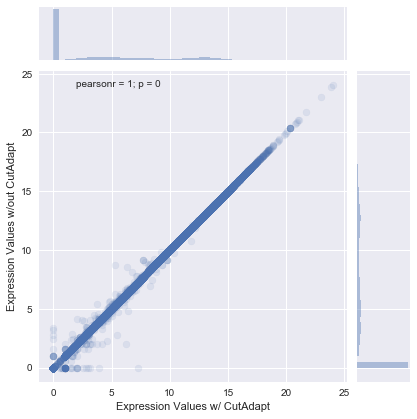

In [5]:
g = sns.jointplot('cut', 'non', data=df)
g.set_axis_labels(xlabel='Expression Values w/ CutAdapt', ylabel='Expression Values w/out CutAdapt')
g.ax_joint.collections[0].set_alpha(0.1)

In [8]:
non.head()

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM
0,ENSG00000000003.14,"ENST00000373020.8,ENST00000494424.1,ENST000004...",2205.11,2049.03,9798.00,3.58,17.98
1,ENSG00000000005.5,"ENST00000373031.4,ENST00000485971.1",1339.00,1182.92,38.00,0.02,0.12
2,ENSG00000000419.12,"ENST00000371582.8,ENST00000371584.8,ENST000003...",1072.84,916.76,5776.00,4.71,23.69
3,ENSG00000000457.13,"ENST00000367770.5,ENST00000367771.10,ENST00000...",3827.70,3671.62,3864.06,0.79,3.96
4,ENSG00000000460.16,"ENST00000286031.10,ENST00000359326.8,ENST00000...",2272.22,2116.14,5451.94,1.93,9.69


Some deviation, but heteroskedasity skews the variance towards the lower expression end where you'd expect the most error.

In [7]:
cut.head()


,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM
0,ENSG00000000003.14,"ENST00000373020.8,ENST00000494424.1,ENST000004...",2205.12,2049.04,9798.00,3.58,17.99
1,ENSG00000000005.5,"ENST00000373031.4,ENST00000485971.1",1339.00,1182.92,38.00,0.02,0.12
2,ENSG00000000419.12,"ENST00000371582.8,ENST00000371584.8,ENST000003...",1072.78,916.70,5765.00,4.71,23.65
3,ENSG00000000457.13,"ENST00000367770.5,ENST00000367771.10,ENST00000...",3828.60,3672.52,3862.22,0.79,3.96
4,ENSG00000000460.16,"ENST00000286031.10,ENST00000359326.8,ENST00000...",2272.15,2116.07,5451.78,1.93,9.69


In [17]:
diff[np.nonzero(diff)]

array([ -1.10000000e+01,  -1.84000000e+00,  -1.60000000e-01, ...,
         2.00000000e-02,  -1.00000000e-02,  -3.05000000e+00])

Number of nonzero diffs: 13559
Largest diff: 6505.73


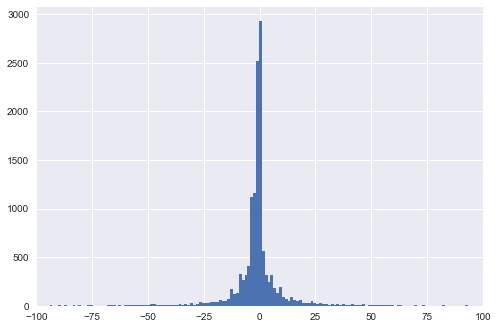

In [19]:
assert list(cut.gene_id) == list(non.gene_id)
diff = np.array(cut.expected_count) - np.array(non.expected_count)
print 'Number of nonzero diffs: ' + str(np.shape(np.nonzero(diff))[1])
print 'Largest diff: ' + str(np.max([np.abs(x) for x in diff]))
plt.hist(diff[np.nonzero(diff)], bins=10000)
plt.xlim([-100, 100])
plt.show()